### Laboratorium 3

In [6]:
#tablice wielowymiarowe w Julii
Asmall=[[1.0 0.0]; [0.0 1.0]]
Bsmall=Asmall
#size(B,1)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [7]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

naive_multiplication (generic function with 1 method)

In [8]:
#kompilacja
naive_multiplication(Asmall,Bsmall)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [9]:
#kompilacja funkcji BLASowej do mnożenia macierzy
#https://docs.julialang.org/en/stable/stdlib/linalg/#BLAS-Functions-1
Asmall*Bsmall

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [10]:
A=rand(1000,1000);
B=rand(1000,1000);

In [11]:
# Należy pamiętać o "column-major" dostępie do tablic - 
# pierwszy indeks zmienia się szybciej
# tak jak Matlab, R, Fortran 
# inaczej niz C, Python
A1 = [[1 2]; [3 4]]
vec(A1)

4-element Array{Int64,1}:
 1
 3
 2
 4

In [12]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
#można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [13]:
better_multiplication(Asmall, Bsmall)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [14]:
@elapsed naive_multiplication(A,B)

2.901390595

In [15]:
@elapsed better_multiplication(A,B)

1.264084598

In [16]:
@elapsed A*B

0.052408705

In [17]:
# aproksymacja sredniokwadratowa wielomianem - tutaj przyklad dla wielomianu 3 stopnia
# pakiet Polynomials jest mozliwy do instalacji pod Juliabox
# https://github.com/JuliaMath/Polynomials.jl
using Polynomials
xs = 0:10; ys = map(x->exp(x), xs)
fit1=polyfit(xs, ys,3)


Poly(-1086.8658708490402 + 2905.5721994684973*x - 1082.7457238744728*x^2 + 100.44658880845468*x^3)

In [18]:
# obliczanie wartosci wielomianu 
fit1(1)

836.4071935534389

In [19]:
# obliczanie wartosci wielomianu (drugi sposób)
polyval(fit1, 1)

836.4071935534389

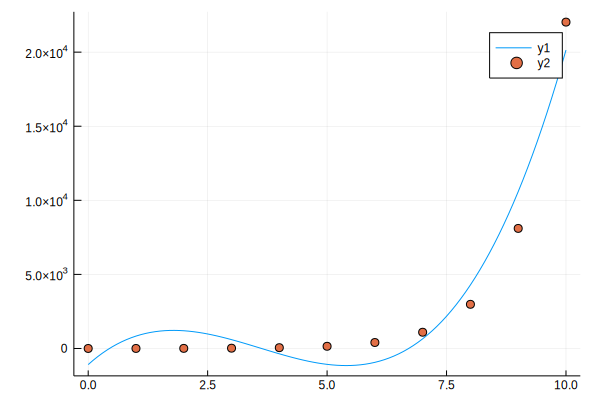

In [20]:
using Plots

# geste punkty do wyliczenia wartosci wielomianu aproksymujacego:
xd=0:0.1:10
# wykres wartosci wielomianu dla gestych punktow:
plot(xd,polyval(fit1, xd))

# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs,ys)


### Zadania
 
1.Uruchomić 
   - naive_multiplication(A,B), 
   - better_multiplication(A,B) 
   - mnożenie BLAS w Julii (A*B) 

dla coraz większych macierzy i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie.
 
2.Napisać w języku C:
    - naiwną metodę mnożenia macierzy (wersja 1) 
    - ulepszoną za pomocą zamiany pętli metodę mnożenia macierzy (wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
    - skorzystać z  możliwości BLAS dostępnego w GSL(wersja 3). 
    
Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1.(osobno niż p.1). (Dla chętnych) sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu.

3.Użyć funkcji polyfit  z pakietu  Polynomials   do znalezienia odpowiednich wielomianow, ktore najlepiej pasują do zależności czasowych kazdego z algorytmow. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianow do wczesniejszych  wykresów.

4.Przedstawić wyniki dla języka Julia i C na wspólnym wykresie. Jaka metoda jest najszybsza? 


In [43]:
using DataFrames
using Plots
using CSV
using StatPlots
using Statistics
using Polynomials

## Zadanie 1

In [30]:
DF = DataFrame(algorithm = String[], size = Int[], time = Float64[])

,algorithm,size,time
,String,Int64,Float64


In [32]:
# naive multiplication
for j = 1:3
    for i = 3:9
        push!(DF,["julia_naive_multiplication", 200*i, @elapsed naive_multiplication(rand(200*i,200*i),rand(200*i,200*i))])
    end
end

print("1 done")

# better multiplication
for j = 1:3
    for i = 3:9
        push!(DF,["julia_better_multiplication", 200*i, @elapsed better_multiplication(rand(200*i,200*i),rand(200*i,200*i))])
    end
end

print("2 done")

# BLAS
for j = 1:3
    for i = 3:9
        push!(DF,["julia_blas_multiplication", 200*i, @elapsed rand(200*i,200*i)*rand(200*i,200*i)])
    end
end

print("3 done")


1 done2 done3 done

In [33]:
DF

,algorithm,size,time
,String,Int64,Float64
1,julia_naive_multiplication,600,0.601535
2,julia_naive_multiplication,800,1.42502
3,julia_naive_multiplication,1000,2.85094
4,julia_naive_multiplication,1200,4.48675
5,julia_naive_multiplication,1400,7.46067
6,julia_naive_multiplication,1600,14.1336
7,julia_naive_multiplication,1800,22.4835
8,julia_naive_multiplication,600,0.550786
9,julia_naive_multiplication,800,1.42994


In [35]:
j_res = by(DF, [1,2]) do dff
    DataFrame(time_mean = mean(dff[3]), time_std = std(dff[3]))
end

,algorithm,size,time_mean,time_std
,String,Int64,Float64,Float64
1,julia_naive_multiplication,600,0.567876,0.029151
2,julia_naive_multiplication,800,1.43227,0.00865177
3,julia_naive_multiplication,1000,2.82372,0.0237267
4,julia_naive_multiplication,1200,4.71007,0.197025
5,julia_naive_multiplication,1400,7.44324,0.0157198
6,julia_naive_multiplication,1600,14.1212,0.0432775
7,julia_naive_multiplication,1800,22.5938,0.53977
8,julia_better_multiplication,600,0.297814,0.0470421
9,julia_better_multiplication,800,0.720305,0.141653


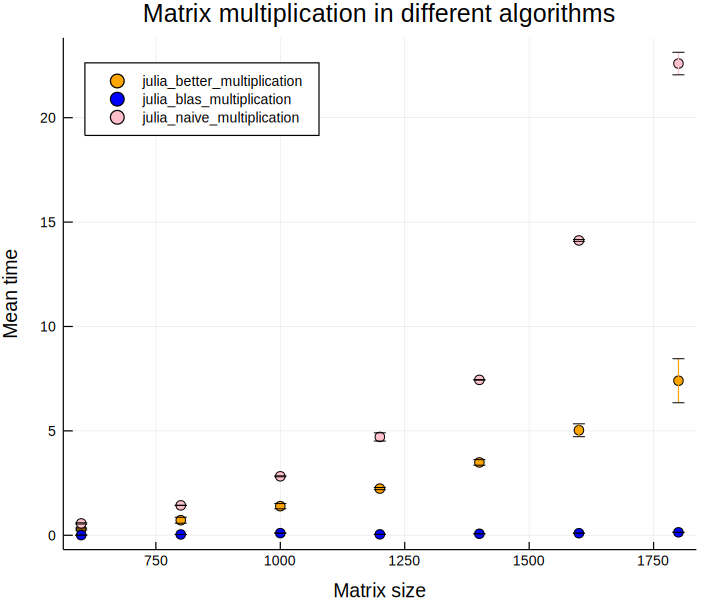

In [89]:
julia_algorithms = scatter(j_res[2], j_res[3], 
        group = j_res[1], 
        layout = 1, 
        color = [:orange :blue :pink], 
        yerr = j_res[4], 
        dpi = 120, 
        size = (600, 500),
        legend = :topleft,
        xlabel = "Matrix size",
        ylabel = "Mean time",
        title = "Matrix multiplication in different algorithms")

## Zadanie 2

In [37]:
c_result=CSV.read("c_result.csv")

,c_naive_multiplication,600,1.555587
,String⍰,Int64⍰,Float64⍰
1,c_naive_multiplication,800,3.01845
2,c_naive_multiplication,1000,17.9202
3,c_naive_multiplication,1200,11.4887
4,c_naive_multiplication,1400,21.8595
5,c_naive_multiplication,1600,35.3344
6,c_naive_multiplication,1800,50.1595
7,c_naive_multiplication,600,1.22853
8,c_naive_multiplication,800,3.15343
9,c_naive_multiplication,1000,7.86828


In [41]:
c_res = by(c_result, [1,2]) do dff
    DataFrame(time_mean = mean(dff[3]), time_std = std(dff[3]))
end

,c_naive_multiplication,600,time_mean,time_std
,String⍰,Int64⍰,Float64,Float64
1,c_naive_multiplication,800,3.0667,0.0752733
2,c_naive_multiplication,1000,13.5127,5.13882
3,c_naive_multiplication,1200,11.4507,0.454928
4,c_naive_multiplication,1400,20.9701,1.34168
5,c_naive_multiplication,1600,32.5503,2.41114
6,c_naive_multiplication,1800,49.6371,1.33852
7,c_naive_multiplication,600,1.18984,0.0547279
8,c_better_multiplication,600,0.629671,0.0134882
9,c_better_multiplication,800,1.4683,0.0108883


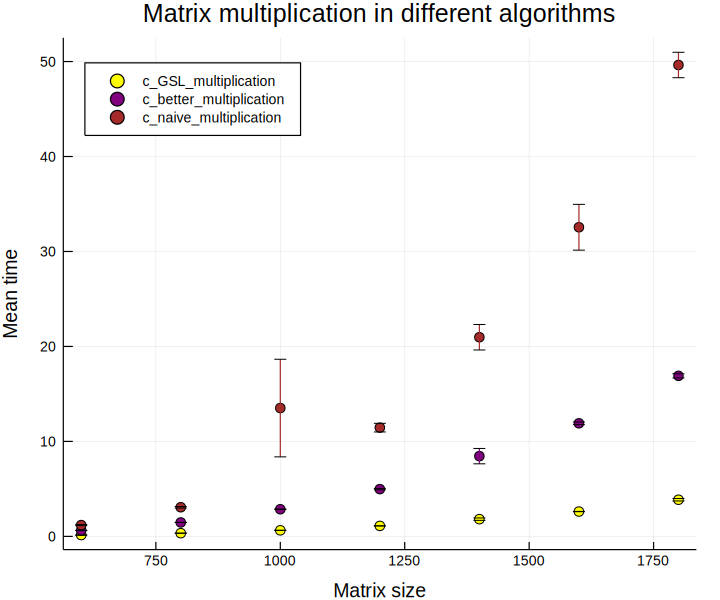

In [88]:
c_algorithms = scatter(c_res[2], c_res[3], 
        group = c_res[1], 
        layout = 1, 
        color = [:yellow :purple :brown], 
        yerr = c_res[4], 
        dpi = 120, 
        size = (600, 500),
        legend = :topleft,
        xlabel = "Matrix size",
        ylabel = "Mean time",
        title = "Matrix multiplication in different algorithms")

In [71]:
c_result_o3 = CSV.read("c_result_o3.csv")

,c_naive_multiplication_o3,600,0.376497
,String⍰,Int64⍰,Float64⍰
1,c_naive_multiplication_o3,800,0.913226
2,c_naive_multiplication_o3,1000,2.20952
3,c_naive_multiplication_o3,1200,4.36019
4,c_naive_multiplication_o3,1400,6.34959
5,c_naive_multiplication_o3,1600,12.5562
6,c_naive_multiplication_o3,1800,23.3639
7,c_naive_multiplication_o3,600,0.354723
8,c_naive_multiplication_o3,800,0.95948
9,c_naive_multiplication_o3,1000,7.17699


In [72]:
c_res_o3 = by(c_result_o3, [1,2]) do dff
    DataFrame(time_mean = mean(dff[3]), time_std = std(dff[3]))
end

,c_naive_multiplication_o3,600,time_mean,time_std
,String⍰,Int64⍰,Float64,Float64
1,c_naive_multiplication_o3,800,0.949103,0.0319769
2,c_naive_multiplication_o3,1000,4.72182,2.48423
3,c_naive_multiplication_o3,1200,3.72196,0.571485
4,c_naive_multiplication_o3,1400,6.47176,0.524929
5,c_naive_multiplication_o3,1600,12.508,0.0571322
6,c_naive_multiplication_o3,1800,23.4983,0.289973
7,c_naive_multiplication_o3,600,0.353279,0.00204142
8,c_better_multiplication_o3,600,0.0646907,0.00315142
9,c_better_multiplication_o3,800,0.219137,0.00694849


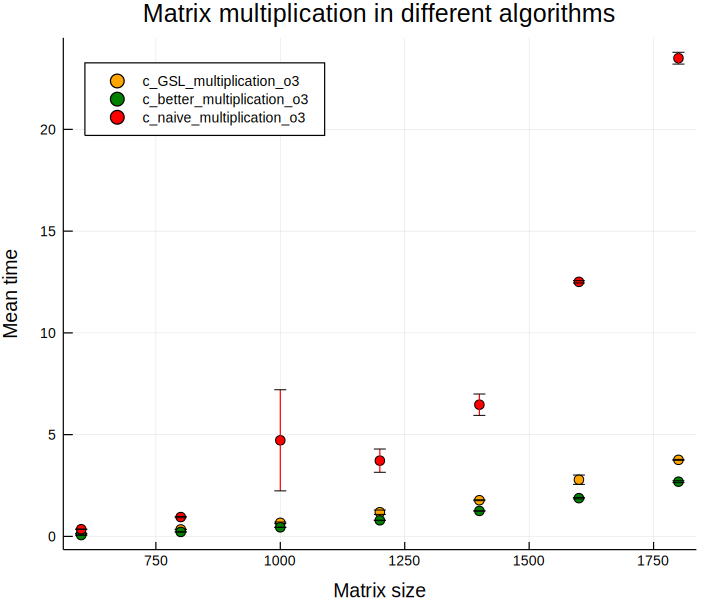

In [87]:
c_o3_algorithms = scatter(c_res_o3[2], c_res_o3[3], 
        group = c_res_o3[1], 
        layout = 1, 
        color = [:orange :green :red], 
        yerr = c_res_o3[4], 
        dpi = 120, 
        size = (600, 500),
        legend = :topleft,
        xlabel = "Matrix size",
        ylabel = "Mean time",
        title = "Matrix multiplication in different algorithms")

## Zadanie 3

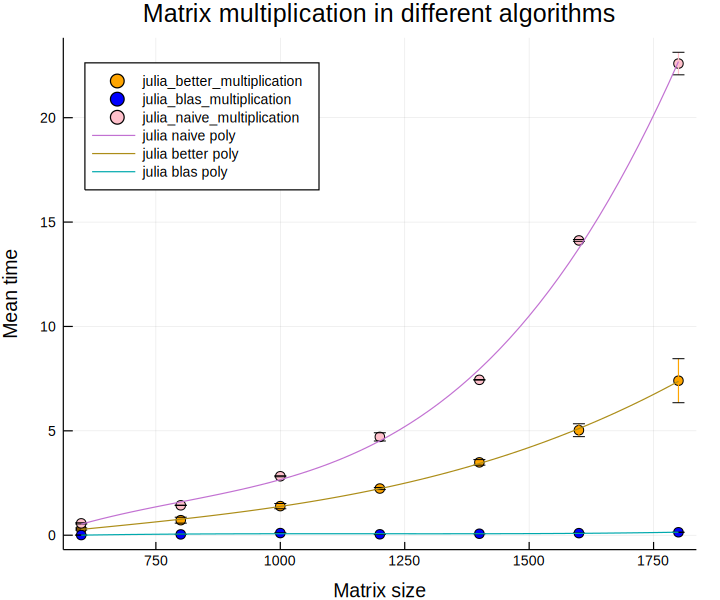

In [85]:
x_step = 600:20:1800
scatter(j_res[2], j_res[3], 
        group = j_res[1], 
        layout = 1, 
        color = [:orange :blue :pink], 
        yerr = j_res[4], 
        dpi = 120, 
        size = (600, 500),
        legend = :topleft,
        xlabel = "Matrix size",
        ylabel = "Mean time",
        title = "Matrix multiplication in different algorithms")


julia_naive_multiplication = groupby(j_res,1)[1]
julia_better_multiplication = groupby(j_res,1)[2]
julia_blas_multiplication = groupby(j_res,1)[3]

y_j_fit_naive = polyval(polyfit(julia_naive_multiplication[2],julia_naive_multiplication[3],3),x_step)
y_j_fit_better = polyval(polyfit(julia_better_multiplication[2],julia_better_multiplication[3],3),x_step)
y_j_fit_blas = polyval(polyfit(julia_blas_multiplication[2],julia_blas_multiplication[3],3),x_step)

plot!(x_step, y_j_fit_naive, label = "julia naive poly")
plot!(x_step, y_j_fit_better, label = "julia better poly")
plot!(x_step, y_j_fit_blas, label = "julia blas poly")

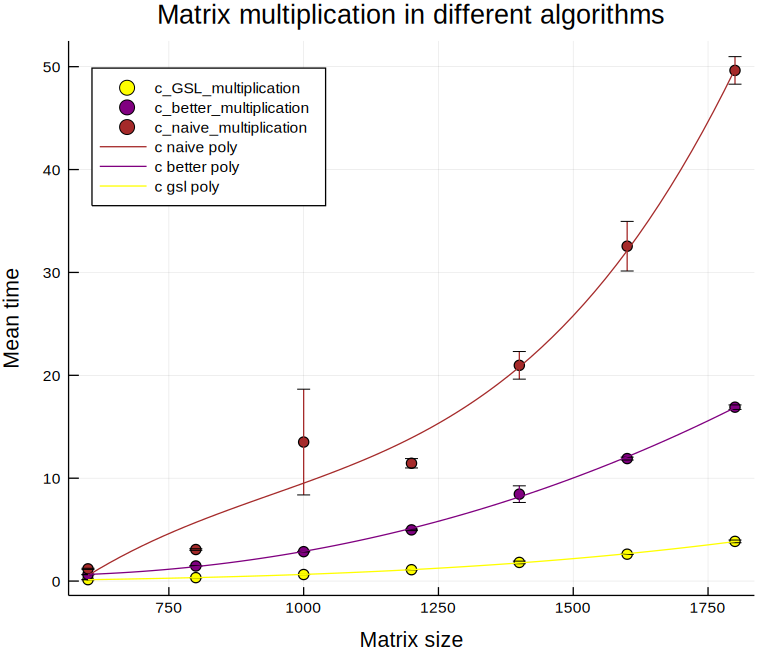

In [83]:
scatter(c_res[2], c_res[3], 
        group = c_res[1], 
        layout = 1, 
        color = [:yellow :purple :brown], 
        yerr = c_res[4], 
        dpi = 130, 
        size = (600, 500),
        legend = :topleft,
        xlabel = "Matrix size",
        ylabel = "Mean time",
        title = "Matrix multiplication in different algorithms")

c_naive_multiplication = groupby(c_res,1)[1]
c_better_multiplication = groupby(c_res,1)[2]
c_blas_multiplication = groupby(c_res,1)[3]

y_c_fit_naive = polyval(polyfit(c_naive_multiplication[2],c_naive_multiplication[3],3),x_step)
y_c_fit_better = polyval(polyfit(c_better_multiplication[2],c_better_multiplication[3],3),x_step)
y_c_fit_blas = polyval(polyfit(c_blas_multiplication[2],c_blas_multiplication[3],3),x_step)

plot!(x_step, y_c_fit_naive, label = "c naive poly", color = [:brown])
plot!(x_step, y_c_fit_better, label = "c better poly",color = [:purple])
plot!(x_step, y_c_fit_blas, label = "c gsl poly",color = [:yellow])

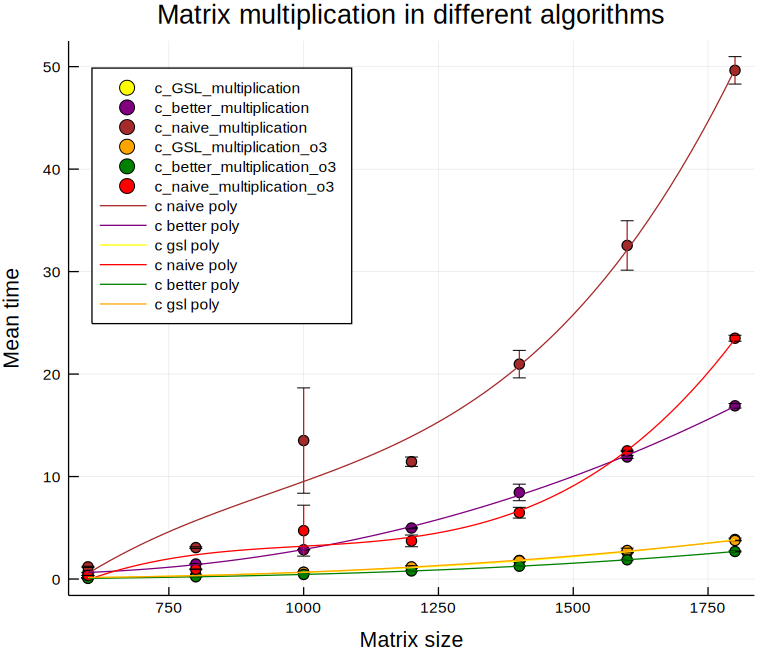

In [82]:
scatter(c_res[2], c_res[3], 
        group = c_res[1], 
        layout = 1, 
        color = [:yellow :purple :brown], 
        yerr = c_res[4], 
        dpi = 100, 
        size = (600, 500),
        legend = :topleft,
        xlabel = "Matrix size",
        ylabel = "Mean time",
        title = "Matrix multiplication in different algorithms")

scatter!(c_res_o3[2], c_res_o3[3], 
        group = c_res_o3[1], 
        layout = 1, 
        color = [:orange :green :red], 
        yerr = c_res_o3[4], 
        dpi = 130, 
        size = (600, 500),
        legend = :topleft,
        xlabel = "Matrix size",
        ylabel = "Mean time",
        title = "Matrix multiplication in different algorithms")

c_naive_multiplication = groupby(c_res,1)[1]
c_better_multiplication = groupby(c_res,1)[2]
c_blas_multiplication = groupby(c_res,1)[3]

y_c_fit_naive = polyval(polyfit(c_naive_multiplication[2],c_naive_multiplication[3],3),x_step)
y_c_fit_better = polyval(polyfit(c_better_multiplication[2],c_better_multiplication[3],3),x_step)
y_c_fit_blas = polyval(polyfit(c_blas_multiplication[2],c_blas_multiplication[3],3),x_step)

plot!(x_step, y_c_fit_naive, label = "c naive poly", color = [:brown])
plot!(x_step, y_c_fit_better, label = "c better poly",color = [:purple])
plot!(x_step, y_c_fit_blas, label = "c gsl poly",color = [:yellow])

c_naive_multiplication_o3 = groupby(c_res_o3,1)[1]
c_better_multiplication_o3 = groupby(c_res_o3,1)[2]
c_blas_multiplication_o3 = groupby(c_res_o3,1)[3]

y_c_fit_naive_o3 = polyval(polyfit(c_naive_multiplication_o3[2],c_naive_multiplication_o3[3],3),x_step)
y_c_fit_better_o3 = polyval(polyfit(c_better_multiplication_o3[2],c_better_multiplication_o3[3],3),x_step)
y_c_fit_blas_o3 = polyval(polyfit(c_blas_multiplication_o3[2],c_blas_multiplication_o3[3],3),x_step)

plot!(x_step, y_c_fit_naive_o3, label = "c naive poly o3", color = [:red])
plot!(x_step, y_c_fit_better_o3, label = "c better poly o3",color = [:green])
plot!(x_step, y_c_fit_blas_o3, label = "c gsl poly o3",color = [:orange])


## Zadanie 4

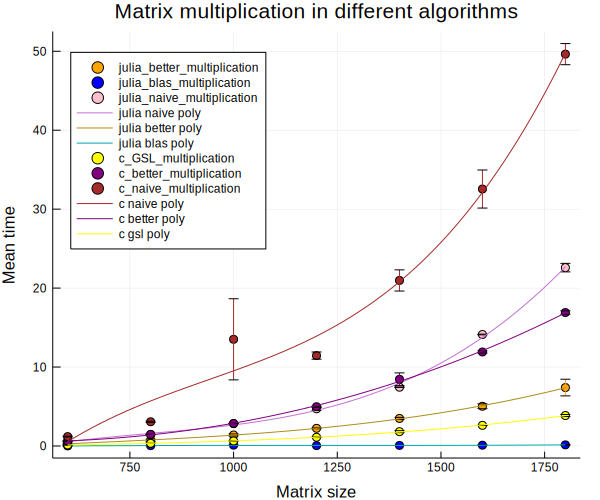

In [70]:
######### Julia ##########
x_step = 600:20:1800
scatter(j_res[2], j_res[3], 
        group = j_res[1], 
        layout = 1, 
        color = [:orange :blue :pink], 
        yerr = j_res[4], 
        dpi = 100, 
        size = (600, 500),
        legend = :topleft,
        xlabel = "Matrix size",
        ylabel = "Mean time",
        title = "Matrix multiplication in different algorithms")


julia_naive_multiplication = groupby(j_res,1)[1]
julia_better_multiplication = groupby(j_res,1)[2]
julia_blas_multiplication = groupby(j_res,1)[3]

y_j_fit_naive = polyval(polyfit(julia_naive_multiplication[2],julia_naive_multiplication[3],3),x_step)
y_j_fit_better = polyval(polyfit(julia_better_multiplication[2],julia_better_multiplication[3],3),x_step)
y_j_fit_blas = polyval(polyfit(julia_blas_multiplication[2],julia_blas_multiplication[3],3),x_step)

plot!(x_step, y_j_fit_naive, label = "julia naive poly")
plot!(x_step, y_j_fit_better, label = "julia better poly")
plot!(x_step, y_j_fit_blas, label = "julia blas poly")




######## C ########

scatter!(c_res[2], c_res[3], 
        group = c_res[1], 
        layout = 1, 
        color = [:yellow :purple :brown], 
        yerr = c_res[4], 
        dpi = 100, 
        size = (600, 500),
        legend = :topleft,
        xlabel = "Matrix size",
        ylabel = "Mean time",
        title = "Matrix multiplication in different algorithms")

c_naive_multiplication = groupby(c_res,1)[1]
c_better_multiplication = groupby(c_res,1)[2]
c_blas_multiplication = groupby(c_res,1)[3]

y_c_fit_naive = polyval(polyfit(c_naive_multiplication[2],c_naive_multiplication[3],3),x_step)
y_c_fit_better = polyval(polyfit(c_better_multiplication[2],c_better_multiplication[3],3),x_step)
y_c_fit_blas = polyval(polyfit(c_blas_multiplication[2],c_blas_multiplication[3],3),x_step)

plot!(x_step, y_c_fit_naive, label = "c naive poly", color = [:brown])
plot!(x_step, y_c_fit_better, label = "c better poly",color = [:purple])
plot!(x_step, y_c_fit_blas, label = "c gsl poly",color = [:yellow])



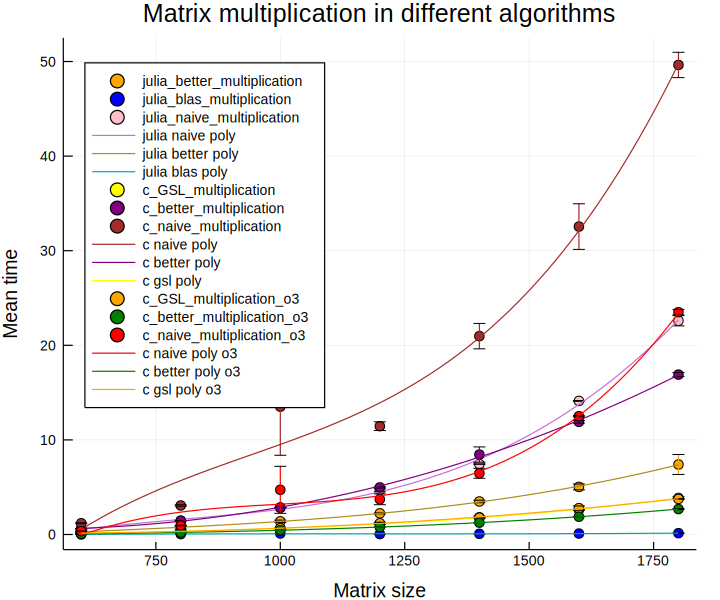

In [92]:
######### Julia ##########
x_step = 600:20:1800
scatter(j_res[2], j_res[3], 
        group = j_res[1], 
        layout = 1, 
        color = [:orange :blue :pink], 
        yerr = j_res[4], 
        dpi = 100, 
        size = (600, 500),
        legend = :topleft,
        xlabel = "Matrix size",
        ylabel = "Mean time",
        title = "Matrix multiplication in different algorithms")


julia_naive_multiplication = groupby(j_res,1)[1]
julia_better_multiplication = groupby(j_res,1)[2]
julia_blas_multiplication = groupby(j_res,1)[3]

y_j_fit_naive = polyval(polyfit(julia_naive_multiplication[2],julia_naive_multiplication[3],3),x_step)
y_j_fit_better = polyval(polyfit(julia_better_multiplication[2],julia_better_multiplication[3],3),x_step)
y_j_fit_blas = polyval(polyfit(julia_blas_multiplication[2],julia_blas_multiplication[3],3),x_step)

plot!(x_step, y_j_fit_naive, label = "julia naive poly")
plot!(x_step, y_j_fit_better, label = "julia better poly")
plot!(x_step, y_j_fit_blas, label = "julia blas poly")




######## C ########

scatter!(c_res[2], c_res[3], 
        group = c_res[1], 
        layout = 1, 
        color = [:yellow :purple :brown], 
        yerr = c_res[4], 
        dpi = 100, 
        size = (600, 500),
        legend = :topleft,
        xlabel = "Matrix size",
        ylabel = "Mean time",
        title = "Matrix multiplication in different algorithms")

c_naive_multiplication = groupby(c_res,1)[1]
c_better_multiplication = groupby(c_res,1)[2]
c_blas_multiplication = groupby(c_res,1)[3]

y_c_fit_naive = polyval(polyfit(c_naive_multiplication[2],c_naive_multiplication[3],3),x_step)
y_c_fit_better = polyval(polyfit(c_better_multiplication[2],c_better_multiplication[3],3),x_step)
y_c_fit_blas = polyval(polyfit(c_blas_multiplication[2],c_blas_multiplication[3],3),x_step)

plot!(x_step, y_c_fit_naive, label = "c naive poly", color = [:brown])
plot!(x_step, y_c_fit_better, label = "c better poly",color = [:purple])
plot!(x_step, y_c_fit_blas, label = "c gsl poly",color = [:yellow])

######## C_o3 ########

scatter!(c_res_o3[2], c_res_o3[3], 
        group = c_res_o3[1], 
        layout = 1, 
        color = [:orange :green :red], 
        yerr = c_res_o3[4], 
        dpi = 120, 
        size = (600, 500),
        legend = :topleft,
        xlabel = "Matrix size",
        ylabel = "Mean time",
        title = "Matrix multiplication in different algorithms")

c_naive_multiplication_o3 = groupby(c_res_o3,1)[1]
c_better_multiplication_o3 = groupby(c_res_o3,1)[2]
c_blas_multiplication_o3 = groupby(c_res_o3,1)[3]

y_c_fit_naive_o3 = polyval(polyfit(c_naive_multiplication_o3[2],c_naive_multiplication_o3[3],3),x_step)
y_c_fit_better_o3 = polyval(polyfit(c_better_multiplication_o3[2],c_better_multiplication_o3[3],3),x_step)
y_c_fit_blas_o3 = polyval(polyfit(c_blas_multiplication_o3[2],c_blas_multiplication_o3[3],3),x_step)

plot!(x_step, y_c_fit_naive_o3, label = "c naive poly o3", color = [:red])
plot!(x_step, y_c_fit_better_o3, label = "c better poly o3",color = [:green])
plot!(x_step, y_c_fit_blas_o3, label = "c gsl poly o3",color = [:orange])